# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# your code here
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.metrics import cohen_kappa_score, classification_report, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/Ironhack/Colab Labs/lab-deep-learning/your-code/tic-tac-toe.csv')
data

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,False
954,o,x,o,x,x,o,x,o,x,False
955,o,x,o,x,o,x,x,o,x,False
956,o,x,o,o,x,x,x,o,x,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB


#### We will have to deal with the X (player X), O (player O) and b (empty) values and change them to integers.
- Player X: 1
- Player O: 2
- Empty values: 0

Since the Class column will be our target, we will drop it now already.

In [4]:
X = data.drop(['class'], axis=1)
y = data['class']

In [5]:
def cleaner(col):
  if col == 'x':
    return 1
  elif col == 'b':
    return 0
  else:
    return 2

In [6]:
for col in X.columns:
  X[col] = X[col].apply(cleaner)

In [7]:
X.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
0,1,1,1,1,2,2,1,2,2
1,1,1,1,1,2,2,2,1,2
2,1,1,1,1,2,2,2,2,1
3,1,1,1,1,2,2,2,0,0
4,1,1,1,1,2,2,0,2,0


In [8]:
y.replace(to_replace=[True, False], value=[1, 0], inplace=True)

In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   TL      958 non-null    int64
 1   TM      958 non-null    int64
 2   TR      958 non-null    int64
 3   ML      958 non-null    int64
 4   MM      958 non-null    int64
 5   MR      958 non-null    int64
 6   BL      958 non-null    int64
 7   BM      958 non-null    int64
 8   BR      958 non-null    int64
dtypes: int64(9)
memory usage: 67.5 KB


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [11]:
# your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)

(766, 9)
(192, 9)


In [12]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler()
transformer.fit(X_train)

X_train_tr = transformer.transform(X_train)
X_test_tr  = transformer.transform(X_test)

X_train_tr = pd.DataFrame(X_train_tr, columns=X_train.columns)
X_test_tr = pd.DataFrame(X_test_tr,  columns=X_test.columns)



In [13]:
model = keras.Sequential()

model.add(Dense(units=9, input_dim=X_train_tr.shape[1], activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 2)                 20        
                                                                 
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________


In [14]:
early_stopping = EarlyStopping(patience=5) 

history = model.fit(
    X_train_tr, 
    y_train, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=20,
    verbose=2,
    callbacks=[early_stopping])

Epoch 1/60
31/31 - 3s - loss: 0.9217 - accuracy: 0.5131 - val_loss: 0.7837 - val_accuracy: 0.6299 - 3s/epoch - 94ms/step
Epoch 2/60
31/31 - 0s - loss: 0.8708 - accuracy: 0.5278 - val_loss: 0.7536 - val_accuracy: 0.6299 - 476ms/epoch - 15ms/step
Epoch 3/60
31/31 - 0s - loss: 0.8303 - accuracy: 0.5474 - val_loss: 0.7284 - val_accuracy: 0.6364 - 497ms/epoch - 16ms/step
Epoch 4/60
31/31 - 0s - loss: 0.7971 - accuracy: 0.5621 - val_loss: 0.7084 - val_accuracy: 0.6364 - 259ms/epoch - 8ms/step
Epoch 5/60
31/31 - 0s - loss: 0.7700 - accuracy: 0.5752 - val_loss: 0.6912 - val_accuracy: 0.6558 - 473ms/epoch - 15ms/step
Epoch 6/60
31/31 - 0s - loss: 0.7459 - accuracy: 0.5833 - val_loss: 0.6779 - val_accuracy: 0.6688 - 485ms/epoch - 16ms/step
Epoch 7/60
31/31 - 0s - loss: 0.7261 - accuracy: 0.5997 - val_loss: 0.6643 - val_accuracy: 0.6883 - 473ms/epoch - 15ms/step
Epoch 8/60
31/31 - 0s - loss: 0.7083 - accuracy: 0.6078 - val_loss: 0.6529 - val_accuracy: 0.6948 - 422ms/epoch - 14ms/step
Epoch 9/60
3

In [15]:
y_train_pred = model.predict(X_train_tr)
y_test_pred  = model.predict(X_test_tr)

6/6 [==============================] - 0s 4ms/step


In [16]:
train_loss, train_acc = model.evaluate(X_train_tr, y_train)
test_loss, test_acc = model.evaluate(X_test_tr, y_test)

print(f'Train Loss: {train_loss}')
print(f'Train Accuracy:  {train_acc}')
print()
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy:  {test_acc}')

6/6 [==============================] - 0s 5ms/step - loss: 0.4886 - accuracy: 0.7656
Train Loss: 0.4667538106441498
Train Accuracy:  0.7597911357879639

Test Loss: 0.48855268955230713
Test Accuracy:  0.765625


In [17]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.yscale('log')
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

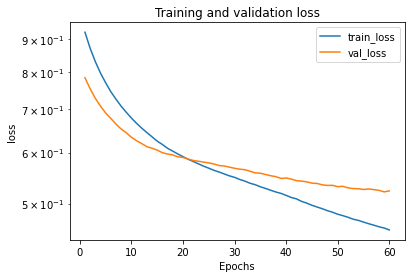

In [18]:
plot_metric(history, 'loss')

In [19]:
model.save('//content/drive/MyDrive/Ironhack/Colab Labs/lab-deep-learning/your-code/models/tic-tac-toe.model')

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [20]:
# your code here
model2 = tf.keras.models.load_model('/content/drive/MyDrive/Ironhack/Colab Labs/lab-deep-learning/your-code/models/tic-tac-toe.model')

In [21]:
sample_df = pd.concat([X,y], axis=1)
sample_test = sample_df.sample(20)
X_s = sample_test.drop('class', axis=1)
y_s = sample_test['class']


In [22]:
y_s_pred = model2.predict(X_s)

1/1 [==============================] - 0s 72ms/step


In [23]:
y_s_pred

array([[0.82787895, 0.17212099],
       [0.92894065, 0.07105935],
       [0.9751083 , 0.02489174],
       [0.47454095, 0.52545905],
       [0.8316562 , 0.16834371],
       [0.8730049 , 0.12699512],
       [0.86224294, 0.13775702],
       [0.8503775 , 0.14962251],
       [0.9780505 , 0.0219495 ],
       [0.64257705, 0.35742295],
       [0.76126474, 0.2387353 ],
       [0.7315864 , 0.26841366],
       [0.86311156, 0.1368884 ],
       [0.8548989 , 0.14510101],
       [0.9490307 , 0.0509693 ],
       [0.9658628 , 0.03413724],
       [0.901178  , 0.09882203],
       [0.97102654, 0.02897342],
       [0.9597349 , 0.04026511],
       [0.8396674 , 0.16033259]], dtype=float32)

In [24]:
np.argmax(y_s_pred[0])

0

In [25]:
y_s

404    1
595    1
687    0
379    1
183    1
821    0
669    0
813    0
65     1
210    1
42     1
600    1
555    1
392    1
917    0
445    1
680    0
249    1
738    0
362    1
Name: class, dtype: int64

In [26]:
checker = {
    'real_val'  :  y_s,
    'predicted_val'  : [np.argmax(i) for i in y_s_pred]
    }

checker = pd.DataFrame(checker)
checker

,real_val,predicted_val
404,1,0
595,1,0
687,0,0
379,1,1
183,1,0
821,0,0
669,0,0
813,0,0
65,1,0
210,1,0


In [27]:
print(checker['real_val'].value_counts())
print(checker['predicted_val'].value_counts())

1    13
0     7
Name: real_val, dtype: int64
0    19
1     1
Name: predicted_val, dtype: int64


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [28]:
# your code here
model = keras.Sequential()

model.add(Dense(units=200, input_dim=X_train_tr.shape[1], activation='relu'))

model.add(Dense(units=50, activation='relu'))

model.add(Dense(2, activation='softmax', activity_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 200)               2000      
                                                                 
 dense_3 (Dense)             (None, 50)                10050     
                                                                 
 dense_4 (Dense)             (None, 2)                 102       
                                                                 
Total params: 12,152
Trainable params: 12,152
Non-trainable params: 0
_________________________________________________________________


In [29]:
early_stopping = EarlyStopping(patience=5) 
history = model.fit(X_train_tr, y_train, epochs=50, validation_split=0.20, batch_size=10, callbacks=[early_stopping])

Epoch 1/50
62/62 [==============================] - 2s 7ms/step - loss: 0.6026 - accuracy: 0.6977 - val_loss: 0.5139 - val_accuracy: 0.7273
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4661 - accuracy: 0.7712 - val_loss: 0.4679 - val_accuracy: 0.8052
Epoch 3/50
62/62 [==============================] - 0s 5ms/step - loss: 0.3913 - accuracy: 0.8072 - val_loss: 0.4313 - val_accuracy: 0.7662
Epoch 4/50
62/62 [==============================] - 0s 5ms/step - loss: 0.3354 - accuracy: 0.8562 - val_loss: 0.3597 - val_accuracy: 0.8247
Epoch 5/50
62/62 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.8676 - val_loss: 0.3912 - val_accuracy: 0.8117
Epoch 6/50
62/62 [==============================] - 0s 5ms/step - loss: 0.2442 - accuracy: 0.8938 - val_loss: 0.3803 - val_accuracy: 0.8377
Epoch 7/50
62/62 [==============================] - 0s 4ms/step - loss: 0.1754 - accuracy: 0.9461 - val_loss: 0.3224 - val_accuracy: 0.8701
Epoch 8/50
62/62 [==

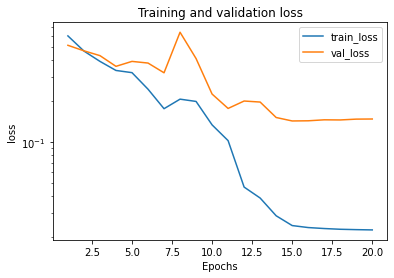

In [30]:
plot_metric(history, 'loss')

In [31]:
train_loss, train_acc = model.evaluate(X_train_tr, y_train)
test_loss, test_acc = model.evaluate(X_test_tr, y_test)

print(f'Train Loss: {train_loss}')
print(f'Train Accuracy:  {train_acc}')
print()
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy:  {test_acc}')

6/6 [==============================] - 0s 5ms/step - loss: 0.1588 - accuracy: 0.9531
Train Loss: 0.047466475516557693
Train Accuracy:  0.9895561337471008

Test Loss: 0.15879034996032715
Test Accuracy:  0.953125


**Which approach(es) did you find helpful to improve your model performance?**

In [32]:
# your answer here

Adding extra neurons to the first layer and setting a hidden layer with less neurons decreased the loss. Also, setting the learning rate helped enormously.